<a href="https://colab.research.google.com/github/madoe001/tf-agents-super-mario/blob/main/Gym_Retro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trainieren eines Reinforcement Learning Models mit TF-Agents, welches Super Mario spielen kann


## 1. Vorwort
Im Rahmen der Modulsprüfung zum Modul "Machine Learning" des  Verbundsstudiengangs "Angewandte Informatik" der Fachhochschule Südwestfalen, ist eine Ausarbeitung anzufertigen, welche sich thematisch mit dem Erstellen von Machine Learning-Modellen auseinandersetzt. 

Dazu wurden von den jeweiligen Studierenden, Projektvorschläge vorgelegt. Die vorliegende Arbeit, setzt sich mit der Anwendung von Reinforcement Learning-Algorithmen auseinander. Als Anwendungsszenario wurde das Erstellen eines Models, welches in der Lage ist das Nintendo Spiel "Super Mario Bros.", gewählt.


## 2. Projektbeschreibung
Das Ziel des Projekts ist die Entwicklung eines Machine Learning Models, welches eigenständig lernt "Super Mario Bros." zu spielen. Die Umsetzung dieses Models erfolgt mit Hilfe der Machine Learning Bibliothek Tensorflow, Tensorflow-Agents und Open-AI Gym Retro.

## TensorFlow-Agents

[Quelle](https://www.tensorflow.org/agents)

## OpenAI-Gym / OpenAI-Gym Retro

## Q-Learning

## Deep Q-Learning

## Policy Gradient


## Proximal Policy Optimization (PPO)

# 3. Reinforcement Learning
Reinfocrcement Learning ist eine Disziplin des Machine Learnings. Mit ihr ist es möglich ein Model zu trainieren, welches in der Lage ist selbstständig Aufgaben zu lösen. Das zu trainierende Model heißt *Agent*. Dieser beobachtet eine *Umgebung*, wie zum Beispiel eine Spielwelt. Der Agent kann mit Hilfe von *Aktionen* mit dieser Spielwelt interagieren. Eine Aktion ist zum Beispiel eine Seitwärtsbewegung einer Spielfigur oder ein Zug im Schach. Das Model erhält nach der Durchführung eine Belohnung und eine Beobachtung. Die Belohnung, auch Reward genannt, dient dazu die Interaktion des Agents mit der Umgebung zu bewerten. Ziel des Models ist es anhand der Belohnungen die beste Strategie zu entwickeln um das gegebene Problem zu lösen. 


## 4. Super Mario Bros.

[Quelle](https://de.wikipedia.org/wiki/Super_Mario_Bros.)

Super Mario Bros. ist ein Jump-'n'-Run Videospiel, der Firma Nintendo. Der Spieler übernimmt in dem Spiel die Rolle des Klempners Mario. Mit der Figur Mario, muss der Spieler anschließend Hindernisse überwinden und Gegner besiegen. Die Spielwelt ist zweidimensional und beinhaltet verschiedene Level mit unterschiedlichen Schwierigkeitsgraden. Ziel eines Levels ist es das Schloss am Ende einese Levels zu erreichen. Die Spielfigur bewegt sich dazu von der linken Seite eines Levels zur rechten Seite. 



### Aktionen:
Zur Steuerung der Spielfigur "Mario" stehen dem Spieler folgende Aktionen zur Verfügung. Diese können beliebig miteinander kombiniert werden, wodurch der Aktionsraum verhältnismäßig groß wird.

*   **Pfeiltaste Links/Rechts:** <br/>
 * Bewegt die Figur nach links oder Rechts

*   **Pfeiltaste Unten:** <br/>
 * Durch drücken der Pfeiltaste unten, duckt sich Mario. 
 * Steht Mario zu dem  Zeitpunkt auf einer Röhre, kann er diese, die Röhre betreten.
 * Runterklettern von Ranken
 
* **Pfeiltaste Unten:** <br/>
 * Raufklettern von Ranken

*   **A-Knopf:** <br/>
 * Durch drücken des A-Knopfs springt Mario.

*   **B-Knopf:** <br/>
 * Durch drücken des B-Knopfs sprintet Mario und kann gegebenenfalls Feuerbälle werfen.

### Umgebung:
Die Umgebung ist eine Open-AI Gym Retro Umgebung, die mit Hilfe eines Emulators das Spiel rendert. Das Spiel "Super Mario Bros." ist eine zweidimensionale Spielwelt. Insgesamt besteht sie aus 224 x 240 Pixeln. Pro Pixel sind drei Werte angegeben, die den jeweiligen Farbkanal (RGB) codieren. 

### Belohnung
Die Belohnung, welche durch die Open-AI Gym Retro bereitgestellt wird, ist die Bewegung des Bildschirm nach rechts. Umso weiter der Agent es schafft in dem Level nach rechts zu kommen, desto höher ist die Belohnung. Das Level ist absolviert, sobald "Super Mario" im Spiel das Schloss erreicht hat. Die Umgebung signalisiert dies mit dem flag *done*. 

### Beobachtung
Als Beobachtung wird ein Screenshot des aktuellen Zustands der Spielwelt zurückgeliefert. Bei Super Mario ist dies ein Array in der Form 224 x 240 x 3. Dieses beinhaltet 224 x 240 Pixel, welche durch drei Farbwerte codiert werden.

# 5. Projekt

Installieren der benötigten Abhängigkeiten

In [1]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg > /dev/null
!pip install 'imageio==2.4.0' > /dev/null
!pip install pyvirtualdisplay > /dev/null
!pip install tf-agents > /dev/null
!pip install gym-retro > /dev/null
!pip install retrowrapper > /dev/null

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic

Mounten eines Google-Drive Laufwerks um dem Notebook die ROM für Super Mario zur Verfügung zu stellen.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importieren der benötigten Abhängikeiten.

In [3]:
from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent
from tf_agents.environments import suite_gym
from tf_agents.environments import utils
from tf_agents.environments import tf_py_environment
from tf_agents.specs import array_spec
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import sequential
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.specs import tensor_spec
from tf_agents.utils import common

Erstellen eines virtuellen Displays, um der Bibliothek eine Ausgabe des Bildes zu simulieren

In [4]:
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

Importieren der "Super Mario Bros."-ROM mit Hilfe des von OpenAI-Gym Retro bereitgestellten Skripts.

In [5]:
!python3 -m retro.import "/content/drive/MyDrive/ROMS/"

Importing SuperMarioBros-Nes
Imported 1 games


Validieren, dass die OpenAI-Gym Umgebung korrekt funktioniert.

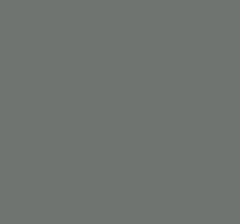

In [6]:
import retro
env = retro.make(game='SuperMarioBros-Nes')
img = PIL.Image.fromarray(env.render(mode="rgb_array"))
img

In [7]:
env.get_screen().shape

(224, 240, 3)

In [8]:
right_action = [0, 0, 0, 0, 0, 0, 0, 1, 0]
#env.reset()

#PIL.Image.fromarray(env.render(mode="rgb_array"))
possible_actions = []
for index in range(9):
  action = [0]*9
  action[index] = 1
  possible_actions.append(env.get_action_meaning(action))

print(possible_actions)


[['B'], [], [], [], ['UP'], ['DOWN'], ['LEFT'], ['RIGHT'], ['A']]


In [9]:
def takeOneValues(source, target): 
  for idx, value in enumerate(source):
    if value == 1: 
      target[idx] = 1
  return target

def combine(list1, list2): 
  if len(list1) > len(list2): 
    size = len(list1)
  else:
    size = len(list2)
  newList = [0]*size
  takeOneValues(list1, newList)
  takeOneValues(list2, newList)
  return newList


In [10]:
single_actions = {} 

for index in range(9):
  action = [0]*9
  action[index] = 1
  key = env.get_action_meaning(action)
  if len(key) >= 1: key = key[0]
  else: continue
  single_actions[key] = action


single_actions

{'A': [0, 0, 0, 0, 0, 0, 0, 0, 1],
 'B': [1, 0, 0, 0, 0, 0, 0, 0, 0],
 'DOWN': [0, 0, 0, 0, 0, 1, 0, 0, 0],
 'LEFT': [0, 0, 0, 0, 0, 0, 1, 0, 0],
 'RIGHT': [0, 0, 0, 0, 0, 0, 0, 1, 0],
 'UP': [0, 0, 0, 0, 1, 0, 0, 0, 0]}

In [11]:
actions = [
    ['A'],
    ['B'],
    ['RIGHT', 'A'],
    ['RIGHT', 'B'],
    ['B','RIGHT', 'A'],
    ['LEFT', 'A'],
    ['LEFT', 'B'],
    ['B','LEFT', 'A'],
    ['UP'],
    ['DOWN']
]

In [12]:
action_values =  []
for idx, action in enumerate(actions):
  x = []
  for key in action:
    x = combine(x, single_actions[key])
  action_values.append(x)
action_values

[[0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0]]

In [13]:
env.close()

## Super Mario Wrapper
Da "Super Mario Bros" standardmäßig einen Action-Spec mit einer Form von (9,) hat, muss dieser um korrekt mit eine selbstgeschriebenen Wrapper geflattet werden. 

In [14]:
from tf_agents.environments import PyEnvironmentBaseWrapper

#flat_action_spec = array_spec.BoundedArraySpec(shape=(), dtype=np.int32, minimum=0, maximum=len(actions), name='action')

class SuperMarioActionWrapper(PyEnvironmentBaseWrapper):

  def __init__(self, env, actions=[]):
    super(PyEnvironmentBaseWrapper, self).__init__()
    self._env = env
    self._actions = actions
    action_spec = array_spec.BoundedArraySpec(
        shape=(), 
        dtype=np.int32, 
        minimum=0, 
        maximum=len(actions), 
        name='action'
        )
  
  def _step(self, action):
    return self._env.step(self._actions[action.item()])

In [33]:
eval_py_env.close()

In [36]:
from tf_agents.policies import random_py_policy
from tf_agents.environments.gym_wrapper import GymWrapper
import retrowrapper

game = "SuperMarioBros-Nes"
eval_py_env = retrowrapper.RetroWrapper(game)
eval_py_env = GymWrapper(eval_py_env)
action_spec = array_spec.BoundedArraySpec(
        shape=(), 
        dtype=np.int32, 
        minimum=0, 
        maximum=len(actions), 
        name='action'
        )
 
random_policy = random_py_policy.RandomPyPolicy(
      time_step_spec=eval_py_env.time_step_spec(), action_spec=action_spec)
time_step = eval_py_env.reset()

action = random_policy.action(time_step).action
print(action)
print(type(action.item()))

eval_py_env.close()

3
<class 'int'>


# Wrappen der Umgebungen
Die Umgebung werden mit Hilfe verschiedener Klassen gewrappt. Dies hat den Vorteil, dass das Lernen beschleunigt und optimiert wird. Des Weiteren wird die Open-AI-Gym Retro Umgebung angepasst, sodass der Actionspace geflatted wird. Für den DQN-Algorithmus von TF-Agents ist ledeglich ein eindimensionaler Actionspace erlaubt. Der Wrapper FlattenActionWrapper transformiert den Actionspace des "Super Mario"-Spiels entsprechend.

In [51]:
from tf_agents.environments.gym_wrapper import GymWrapper
from tf_agents.environments import wrappers
from tf_agents.environments import utils
import retrowrapper

game = "SuperMarioBros-Nes"
eval_py_env = retrowrapper.RetroWrapper(game)
#train_py_env = retrowrapper.RetroWrapper(game)

eval_py_env = GymWrapper(eval_py_env)
eval_py_env = SuperMarioActionWrapper(eval_py_env, action_values)
eval_py_env = wrappers.TimeLimit(eval_py_env, 1000)

# flat_action_spec = tf.nest.flatten(eval_py_env.action_spec())

print(flat_action_spec)

utils.validate_py_environment(eval_py_env, episodes=1)
# eval_py_env = wrappers.HistoryWrapper(eval_py_env)
eval_py_env.close()
#print('Action Spec:', eval_py_env.action_spec())
#eval_py_env = wrappers.ActionDiscretizeWrapper(eval_py_env, num_actions=9)#np.shape(eval_py_env.action_spec()))
#print('Discretized Action Spec:', eval_py_env.action_spec())
#print('Discretized Action Spec(flat):', eval_py_env.action_spec())

#utils.validate_py_environment(eval_py_env, episodes=1)

#train_py_env = GymWrapper(train_py_env)
# train_py_env = wrappers.HistoryWrapper(train_py_env)
#train_py_env = FlattenActionWrapper(train_py_env)
#train_py_env = wrappers.ActionDiscretizeWrapper(train_py_env, num_actions=9)#np.shape(train_py_env.action_spec()))
#utils.validate_py_environment(train_py_env, episodes=1)


BoundedArraySpec(shape=(), dtype=dtype('int32'), name='action', minimum=0, maximum=10)


TypeError: ignored

In [47]:
eval_py_env.close()

Umwandeln der Python-Umgebungen in Tensorflowumgebungen ([Quelle](https://www.tensorflow.org/agents/tutorials/2_environments_tutorial#tensorflow_environments))

In [ ]:
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)
train_env = tf_py_environment.TFPyEnvironment(train_py_env)

GPU einschalten

In [ ]:
use_gpu = True

strategy = strategy_utils.get_strategy(tpu=False, use_gpu=use_gpu)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


Erstellen eines Critic-Netzwerks, welches fürs Training genutzt wird.

Erstellen eines QNetworks, welches aus mehreren Schichten besteht und am ende für jede Action eine Ausgabe liefert. ([Quelle](https://www.tensorflow.org/agents/tutorials/1_dqn_tutorial#agent))

In [ ]:
fc_layer_params = (100, 50)
action_tensor_spec = tensor_spec.from_spec(env.action_spec())
num_actions = action_tensor_spec.maximum - action_tensor_spec.minimum + 1

# Define a helper function to create Dense layers configured with the right
# activation and kernel initializer.
def dense_layer(num_units):
  return tf.keras.layers.Dense(
      num_units,
      activation=tf.keras.activations.relu,
      kernel_initializer=tf.keras.initializers.VarianceScaling(
          scale=2.0, mode='fan_in', distribution='truncated_normal'))

# QNetwork consists of a sequence of Dense layers followed by a dense layer
# with `num_actions` units to generate one q_value per available action as
# it's output.
dense_layers = [dense_layer(num_units) for num_units in fc_layer_params]
q_values_layer = tf.keras.layers.Dense(
    num_actions,
    activation=None,
    kernel_initializer=tf.keras.initializers.RandomUniform(
        minval=-0.03, maxval=0.03),
    bias_initializer=tf.keras.initializers.Constant(-0.2))
q_net = sequential.Sequential(dense_layers + [q_values_layer])

NameError: ignored

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()

NameError: ignored

Initialisieren des Agents

In [ ]:
with strategy.scope():
  train_step = train_utils.create_train_step()

  tf_agent = sac_agent.SacAgent(
        time_step_spec,
        action_spec,
        actor_network=actor_net,
        critic_network=critic_net,
        actor_optimizer=tf.compat.v1.train.AdamOptimizer(
            learning_rate=actor_learning_rate),
        critic_optimizer=tf.compat.v1.train.AdamOptimizer(
            learning_rate=critic_learning_rate),
        alpha_optimizer=tf.compat.v1.train.AdamOptimizer(
            learning_rate=alpha_learning_rate),
        target_update_tau=target_update_tau,
        target_update_period=target_update_period,
        td_errors_loss_fn=tf.math.squared_difference,
        gamma=gamma,
        reward_scale_factor=reward_scale_factor,
        train_step_counter=train_step)

  tf_agent.initialize()

In [ ]:
fc_layer_params = (100, 50)
action_tensor_spec = tensor_spec.from_spec(train_env.action_spec())
num_actions = action_tensor_spec.maximum - action_tensor_spec.minimum + 1

print(action_tensor_spec.maximum)
print(action_tensor_spec.minimum)

print(num_actions)
# Define a helper function to create Dense layers configured with the right
# activation and kernel initializer.
def dense_layer(num_units):
  return tf.keras.layers.Dense(
      num_units,
      activation=tf.keras.activations.relu,
      kernel_initializer=tf.keras.initializers.VarianceScaling(
          scale=2.0, mode='fan_in', distribution='truncated_normal'))

# QNetwork consists of a sequence of Dense layers followed by a dense layer
# with `num_actions` units to generate one q_value per available action as
# it's output.
dense_layers = [dense_layer(num_units) for num_units in fc_layer_params]
q_values_layer = tf.keras.layers.Dense(
    num_actions,
    activation=None,
    kernel_initializer=tf.keras.initializers.RandomUniform(
        minval=-0.03, maxval=0.03),
    bias_initializer=tf.keras.initializers.Constant(-0.2))

q_net = sequential.Sequential(dense_layers + [q_values_layer])

8
0
9


# Hyperparameter

In [ ]:
num_iterations = 100000 # @param {type:"integer"}

initial_collect_steps = 10000 # @param {type:"integer"}
collect_steps_per_iteration = 1 # @param {type:"integer"}
replay_buffer_capacity = 10000 # @param {type:"integer"}

batch_size = 256 # @param {type:"integer"}

critic_learning_rate = 3e-4 # @param {type:"number"}
actor_learning_rate = 3e-4 # @param {type:"number"}
alpha_learning_rate = 3e-4 # @param {type:"number"}
target_update_tau = 0.005 # @param {type:"number"}
target_update_period = 1 # @param {type:"number"}
gamma = 0.99 # @param {type:"number"}
reward_scale_factor = 1.0 # @param {type:"number"}

actor_fc_layer_params = (256, 256)
critic_joint_fc_layer_params = (256, 256)

log_interval = 5000 # @param {type:"integer"}

num_eval_episodes = 20 # @param {type:"integer"}
eval_interval = 10000 # @param {type:"integer"}

policy_save_interval = 5000 # @param {type:"integer"}

In [ ]:
flat_action_spec = tf.nest.flatten(train_env.action_spec())
print(len(flat_action_spec))
print(flat_action_spec[0].shape.rank)
print(flat_action_spec[0].shape)
print(flat_action_spec)
print(train_env.action_spec())

1
1
(9,)
[BoundedTensorSpec(shape=(9,), dtype=tf.int32, name='FlattenedActionSpec', minimum=array(0, dtype=int32), maximum=array(8, dtype=int32))]
BoundedTensorSpec(shape=(9,), dtype=tf.int32, name='FlattenedActionSpec', minimum=array(0, dtype=int32), maximum=array(8, dtype=int32))


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()

ValueError: ignored

In [ ]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

In [ ]:
num_episodes = 1
video_filename = 'imageio.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
  for _ in range(num_episodes):
    time_step = eval_env.reset()
    video.append_data(eval_py_env.render())
    while not time_step.is_last():
      action_step = tf_policy.action(time_step)
      time_step = eval_env.step(action_step.action)
      video.append_data(eval_py_env.render())

embed_mp4(video_filename)